## DAC IFEST UNPAD 2024 (Tim Sudah Saatnya)
- Erlin Shofiana (Ketua Tim)
- Aulia Mirfah Setyo Ayu Damayanti (Anggota)
- Fitri Hartanti (Anggota)

# *Clustering (Gaussian Mixture Model)*

In [11]:
import pandas as pd
import seaborn as sb 
df = pd.read_excel("Data Sanitasi.xlsx", sheet_name = "Indonesia")
df

,Provinsi,Air Minum Layak,Sanitasi Layak,Cuci Tangan Layak
0,ACEH,89.74,78.85,72.59
1,SUMATERA UTARA,92.19,84.18,73.92
2,SUMATERA BARAT,85.59,70.97,88.77
3,RIAU,90.47,84.58,72.29
4,JAMBI,80.02,83.04,73.41
5,SUMATERA SELATAN,87.19,80.54,75.24
6,BENGKULU,73.08,80.28,81.41
7,LAMPUNG,82.78,84.58,79.39
8,KEP. BANGKA BELITUNG,81.64,93.21,88.17
9,KEP. RIAU,92.10,91.10,85.97


In [12]:
df.set_index('Provinsi', drop = True, inplace = True)
df

,Air Minum Layak,Sanitasi Layak,Cuci Tangan Layak
Provinsi,,,
ACEH,89.74,78.85,72.59
SUMATERA UTARA,92.19,84.18,73.92
SUMATERA BARAT,85.59,70.97,88.77
RIAU,90.47,84.58,72.29
JAMBI,80.02,83.04,73.41
SUMATERA SELATAN,87.19,80.54,75.24
BENGKULU,73.08,80.28,81.41
LAMPUNG,82.78,84.58,79.39
KEP. BANGKA BELITUNG,81.64,93.21,88.17


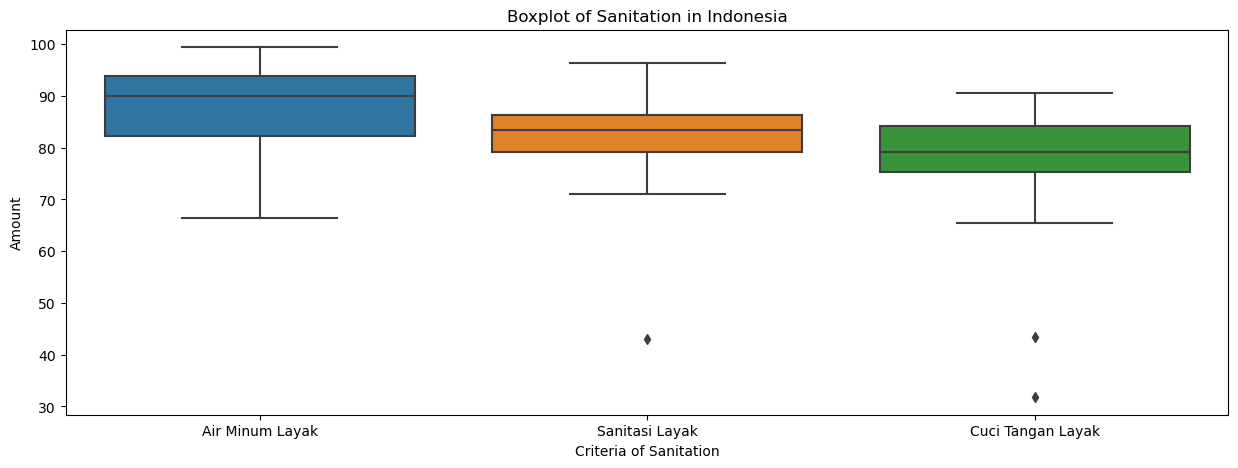

,Air Minum Layak,Sanitasi Layak,Cuci Tangan Layak
count,34.000000,34.000000,34.000000
mean,88.188529,82.570882,77.584706
std,7.753046,9.458824,11.679975
min,66.490000,43.000000,31.780000
25%,82.255000,79.110000,75.300000
50%,89.965000,83.380000,79.130000
75%,93.835000,86.285000,84.122500
max,99.420000,96.420000,90.540000


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat boxplot dengan seaborn
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title('Boxplot of Sanitation in Indonesia')
plt.xlabel('Criteria of Sanitation')
plt.ylabel('Amount')
plt.show()

# Menampilkan summary statistics
summary_stats = df.describe()
summary_stats


In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = df.index)


In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

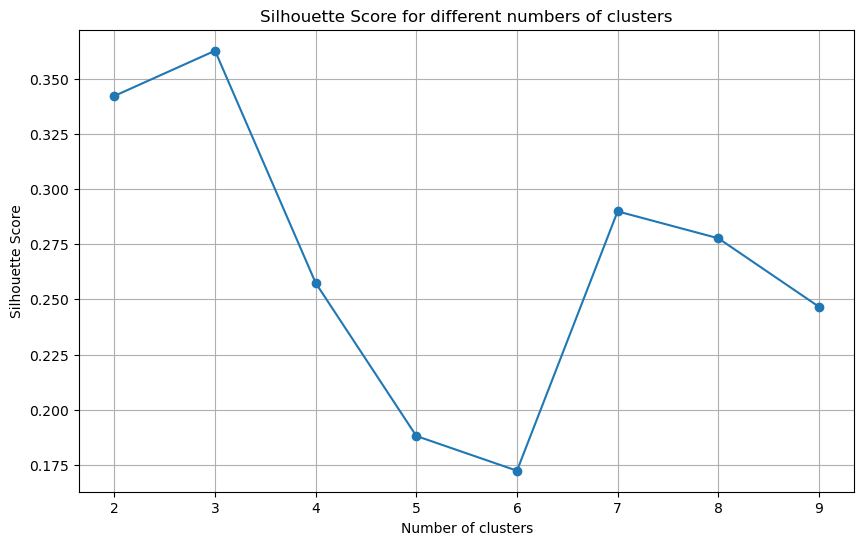

In [16]:
from sklearn.mixture import GaussianMixture
silhouette_scores = []
cluster_range = range(2, 10)  

for n_clusters in cluster_range:
    gmm_cluster = GaussianMixture(n_components=n_clusters, random_state=26)
    cluster_labels = gmm_cluster.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

gmm_cluster = GaussianMixture(n_components=3, random_state=26)
cluster_labels = gmm_cluster.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

df['Cluster'] = cluster_labels
df

Silhouette Score: 0.3627123729917369
Davies-Bouldin Index: 0.7899462266690008
Calinski-Harabasz Index: 27.148208363054604


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Air Minum Layak,Sanitasi Layak,Cuci Tangan Layak,Cluster
Provinsi,,,,
ACEH,89.74,78.85,72.59,0
SUMATERA UTARA,92.19,84.18,73.92,0
SUMATERA BARAT,85.59,70.97,88.77,1
RIAU,90.47,84.58,72.29,0
JAMBI,80.02,83.04,73.41,1
SUMATERA SELATAN,87.19,80.54,75.24,0
BENGKULU,73.08,80.28,81.41,1
LAMPUNG,82.78,84.58,79.39,1
KEP. BANGKA BELITUNG,81.64,93.21,88.17,1


Karakteristik Rata-rata Fitur Berdasarkan Klaster:
         Air Minum Layak  Sanitasi Layak  Cuci Tangan Layak
Cluster                                                    
0              92.860909       85.479091          80.560000
1              80.816364       80.351818          75.798182
2              66.490000       43.000000          31.780000


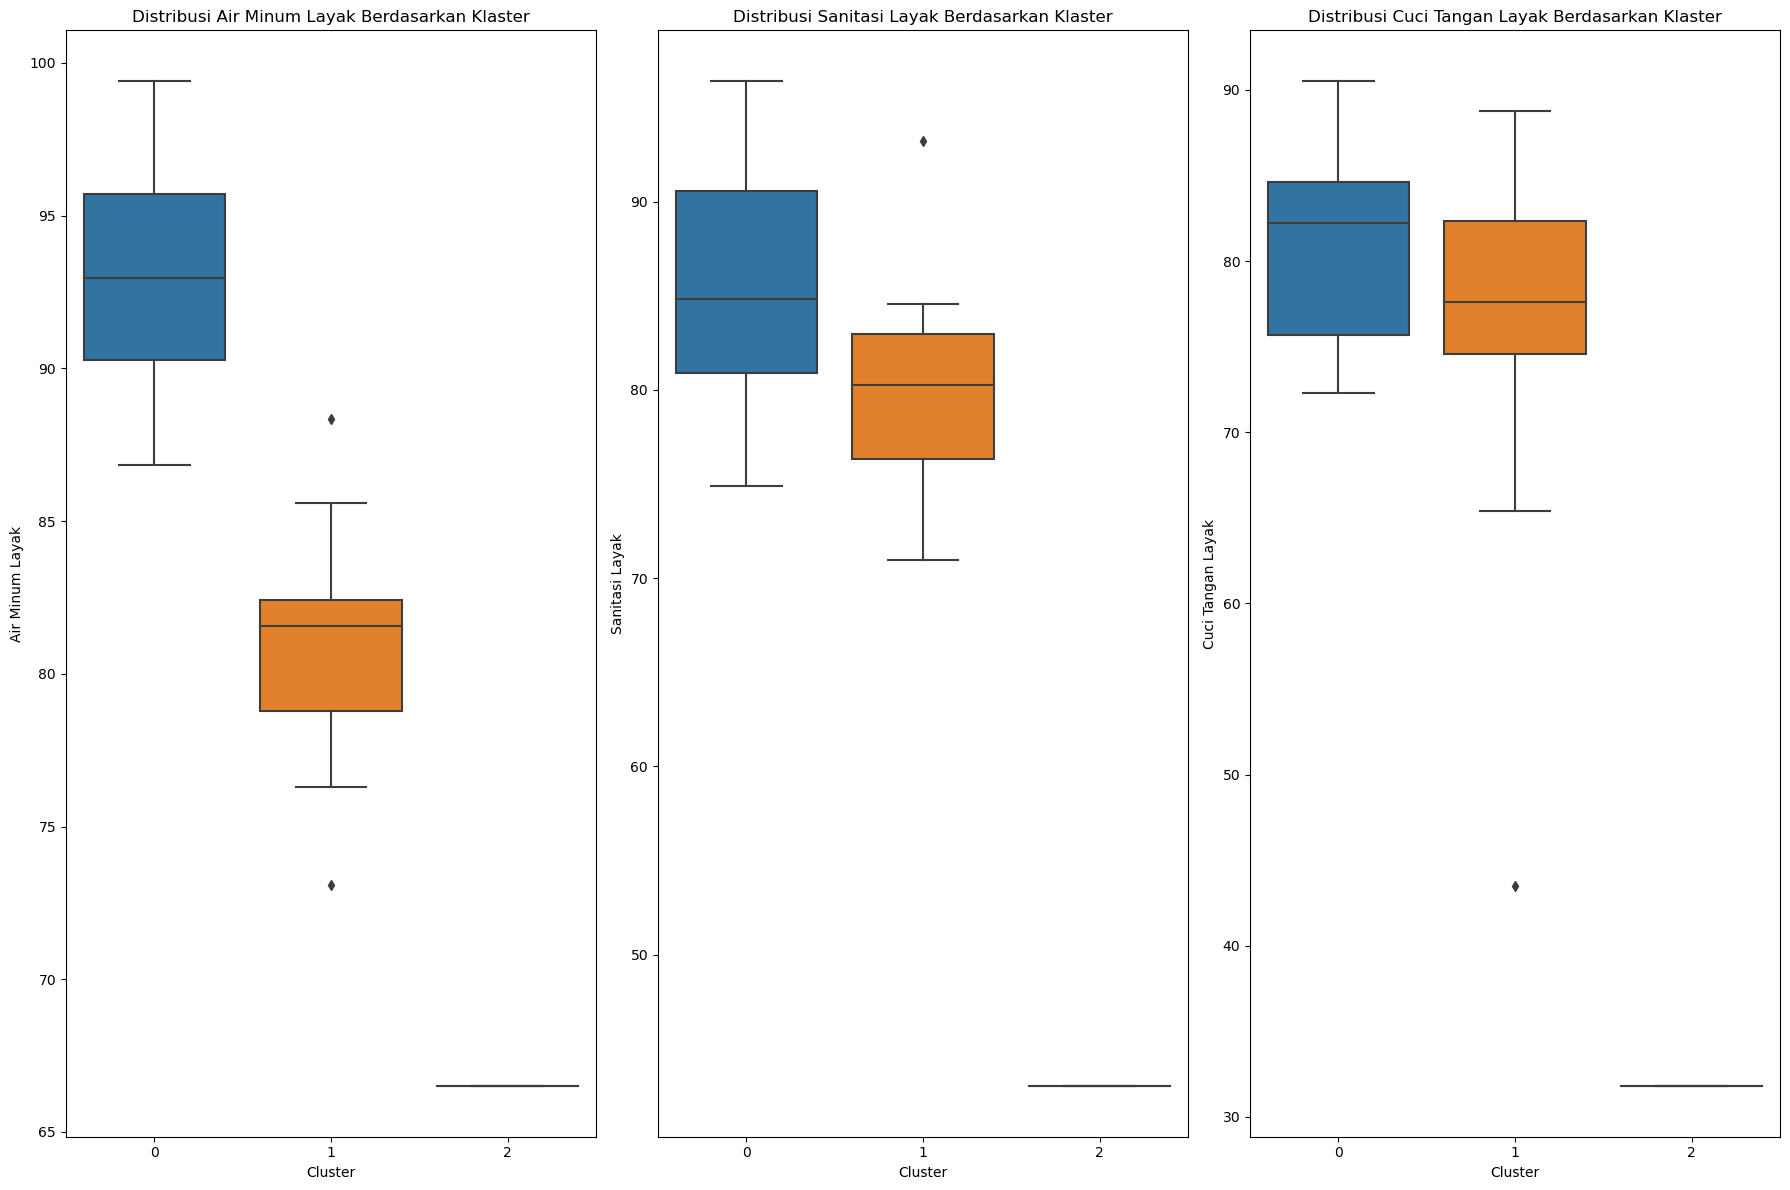

In [19]:
import numpy as np
# Analisis Karakteristik Klaster
print('Karakteristik Rata-rata Fitur Berdasarkan Klaster:')
print(df.groupby('Cluster').mean())

# Visualisasi distribusi fitur berdasarkan klaster dengan 3 kolom
plt.figure(figsize=(18, 12))

# Tentukan jumlah kolom untuk visualisasi (3 kolom)
n_cols = 3
n_rows = int(np.ceil(len(df.columns[:-1]) / n_cols))  # Mengabaikan kolom 'Cluster'

for i, column in enumerate(df.columns[:-1]):  # Mengabaikan kolom 'Cluster'
    plt.subplot(n_rows, n_cols, i + 1)  # Mengatur layout untuk 3 kolom
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribusi {column} Berdasarkan Klaster')

plt.tight_layout()
plt.show()


# *Forecasting (CNN)*

In [20]:
import pandas as pd

In [21]:
df = pd.read_excel('SH_H2O_SAFE.xlsx', sheet_name = "Sheet1")
df.tail()

,Year,Safe Water
18,2018,29.15156
19,2019,29.43392
20,2020,29.71392
21,2021,29.99125
22,2022,30.26617


In [22]:
df

,Year,Safe Water
0,2000,23.54184
1,2001,23.87744
2,2002,24.21128
3,2003,24.54321
4,2004,24.87348
5,2005,25.20142
6,2006,25.52742
7,2007,25.85121
8,2008,26.17304
9,2009,26.49239


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        23 non-null     int64  
 1   Safe Water  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


In [24]:
import pandas as pd
import numpy as np
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

In [25]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [26]:
x1 = array(df['Safe Water'])

In [27]:
x1 = x1.reshape((len(x1), 1))

In [28]:
n_steps = 5

In [29]:
X1, y1 = split_sequence(x1, n_steps)

In [30]:
n_features = 1

In [31]:
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1_scaled = scaler.fit_transform(X1.reshape(-1, X1.shape[-1])).reshape(X1.shape)
y1_scaled = scaler.fit_transform(y1.reshape(-1, y1.shape[-1])).reshape(y1.shape)

In [33]:
X1_scaled

array([[[0.        ],
        [0.05203577],
        [0.10379864],
        [0.15526537],
        [0.2064747 ]],

       [[0.05203577],
        [0.10379864],
        [0.15526537],
        [0.2064747 ],
        [0.25732276]],

       [[0.10379864],
        [0.15526537],
        [0.2064747 ],
        [0.25732276],
        [0.30787002]],

       [[0.15526537],
        [0.2064747 ],
        [0.25732276],
        [0.30787002],
        [0.35807461]],

       [[0.2064747 ],
        [0.25732276],
        [0.30787002],
        [0.35807461],
        [0.4079753 ]],

       [[0.25732276],
        [0.30787002],
        [0.35807461],
        [0.4079753 ],
        [0.45749146]],

       [[0.30787002],
        [0.35807461],
        [0.4079753 ],
        [0.45749146],
        [0.50628817]],

       [[0.35807461],
        [0.4079753 ],
        [0.45749146],
        [0.50628817],
        [0.55289088]],

       [[0.4079753 ],
        [0.45749146],
        [0.50628817],
        [0.55289088],
        [0.59918

In [34]:
import pandas as pd
import numpy as np
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
loss_per_fold = []

for train_index, test_index in kf.split(X1_scaled):
    X_train, X_test = X1_scaled[train_index], X1_scaled[test_index]
    y_train, y_test = y1_scaled[train_index], y1_scaled[test_index]
    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, X1_scaled.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    print(f"Training for fold {fold_no}...")
    model.fit(X_train, y_train, epochs=200, verbose=0)
    
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} loss: {loss}")
    
    loss_per_fold.append(loss)
    fold_no += 1

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training for fold 1...
Fold 1 loss: 5.5219676141859964e-05
Training for fold 2...
Fold 2 loss: 2.733106339292135e-05
Training for fold 3...
Fold 3 loss: 7.277235454239417e-07
Training for fold 4...
Fold 4 loss: 5.661517661792459e-06
Training for fold 5...
Fold 5 loss: 5.928683094680309e-06


In [39]:
mean_loss = np.mean(loss_per_fold)
mean_loss

1.8973732767335606e-05

In [36]:
X1_scaled.shape

(18, 5, 1)

In [37]:
x_input = X1_scaled[-1].reshape((1, n_steps, n_features))

predictions = []
for i in range(8):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0,0])
    # Update the input for the next prediction
    x_input = array([x_input[0, 1:, 0].tolist() + [yhat[0,0]]])
    x_input = x_input.reshape((1, n_steps, n_features))

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
print("Predictions Until 2030:")
print(predictions)

Predictions Until 2030:
[30.258307 30.447468 30.637392 30.797346 30.950466 31.139153 31.333328
 31.527395]


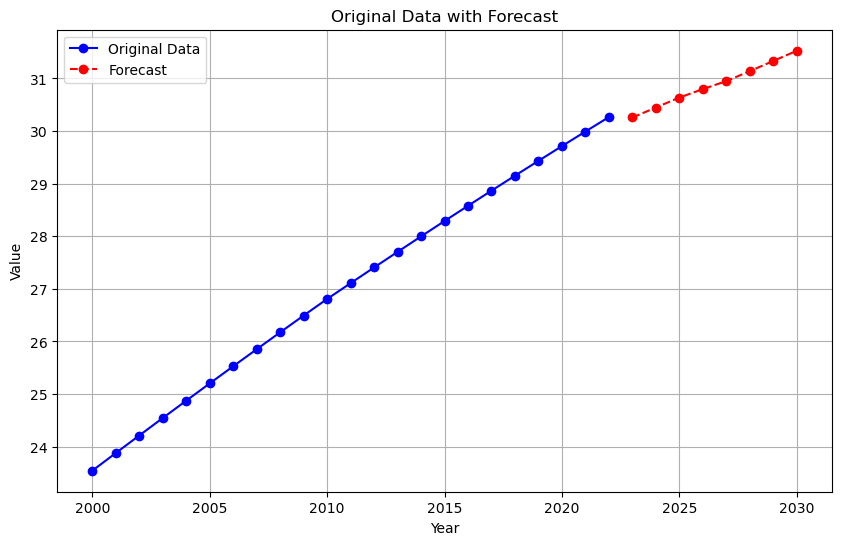

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Data sample
X1_asli = np.array(df['Safe Water'])
X1_ramal = np.array(predictions)

# Indeks tahun mulai dari 2000
indices = np.arange(2000, 2000 + len(X1_asli) + len(X1_ramal))

plt.figure(figsize=(10, 6))

# Plot data asli (Original Data) dengan marker bulat dan warna biru
plt.plot(indices[:len(X1_asli)], X1_asli, label='Original Data', color='blue', marker='o')

# Plot data ramal (Forecast) dengan garis dashed dan warna merah
plt.plot(indices[len(X1_asli):], X1_ramal, label='Forecast', color='red', linestyle='dashed', marker='o')

# Menambahkan label untuk sumbu dan judul
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Original Data with Forecast')

# Menampilkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()
